In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [8]:
schools_cleaned = pd.read_csv("../data/processed/schools_cleaned.csv")
crime_cleaned = pd.read_csv("../data/processed/crime_cleaned.csv")
merged = pd.read_csv("../data/processed/merged_school_crime.csv")


<h4> Characterizing the Crime Environment

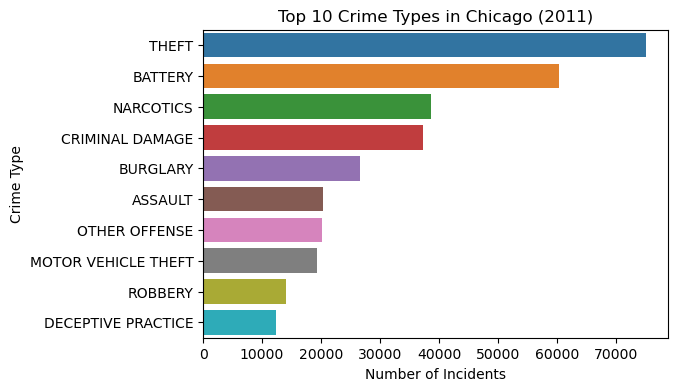

In [9]:
top_crime = crime_cleaned['Crime_Type'].value_counts().nlargest(10).index

crime_top_10 = crime_cleaned[crime_cleaned['Crime_Type'].isin(top_crime)]

plt.figure(figsize=(6, 4))
sns.countplot(data=crime_top_10, y='Crime_Type', order=top_crime)
plt.title('Top 10 Crime Types in Chicago (2011)')
plt.xlabel('Number of Incidents')
plt.ylabel('Crime Type')
plt.show()


<h4> School Performance Distribution by Type

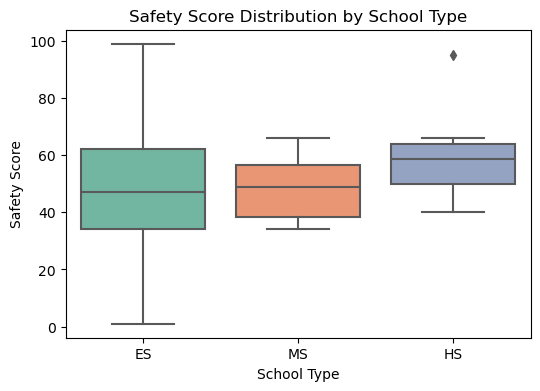

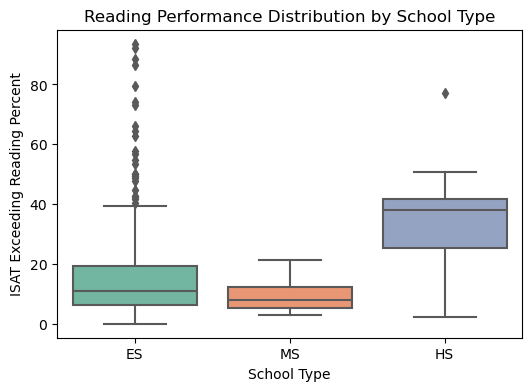

In [10]:
merged = merged.rename(columns={'Elementary,_Middle,_or_High_School': 'School_Type'})

plt.figure(figsize=(6, 4))
sns.boxplot(data=merged, x='School_Type', y='Safety_Score', palette='Set2')
plt.title('Safety Score Distribution by School Type')
plt.xlabel('School Type')
plt.ylabel('Safety Score')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=merged, x='School_Type', y='ISAT_Exceeding_Reading_Percent', palette='Set2')
plt.title('Reading Performance Distribution by School Type')
plt.xlabel('School Type')
plt.ylabel('ISAT Exceeding Reading Percent')
plt.show()

In both safety and academic performance metrics, high schools generally have higher median scores than elementary or middle schools. However, elementary schools have high variability in both metrics, suggesting that there is a wide disparity in environment and academic success within that group.

<h4>Correlation of School Metrics and Ward Crime

In [14]:
model = sm.OLS(merged['Safety_Score'], sm.add_constant(merged['Crime_Count']) ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Safety_Score   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 02 Dec 2025   Prob (F-statistic):           1.49e-21
Time:                        15:50:36   Log-Likelihood:                -1882.6
No. Observations:                 436   AIC:                             3769.
Df Residuals:                     434   BIC:                             3777.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          69.3358      2.139     32.414      

For every increase of 1000 crimes in a ward, the safety score is predicted to drop by 2.5 points. Since the R-squared value is 0.189, this means that 18.9% of the variability in safety_score is explained by crime_count, suggesting that other factors are affecting a schools safety score. 

<h4>Crime and Attendance Analysis

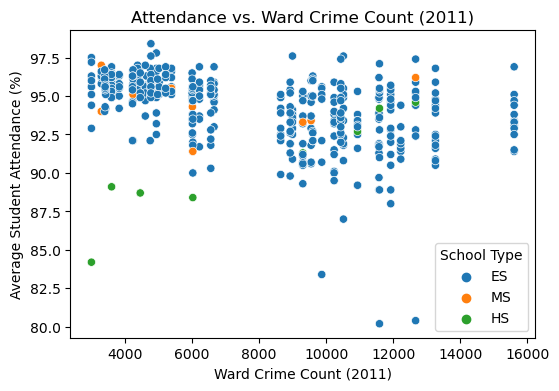


Overall Correlation (Attendance vs. Crime Count): -0.426


In [15]:
merged['Average_Student_Attendance'] = (
    merged['Average_Student_Attendance']
    .str.replace('%', '')
    .astype(float)
)

plt.figure(figsize=(6, 4))
sns.scatterplot(data=merged, x='Crime_Count', y='Average_Student_Attendance', hue='School_Type')
plt.title("Attendance vs. Ward Crime Count (2011)")
plt.xlabel("Ward Crime Count (2011)")
plt.ylabel("Average Student Attendance (%)")
plt.legend(title="School Type")
plt.show()

attendance_corr = merged['Average_Student_Attendance'].corr(merged['Crime_Count'])
print(f"\nOverall Correlation (Attendance vs. Crime Count): {attendance_corr:.3f}")

<h4> Grouped Correlation: Influence of School Type

In [16]:
grouped_corr = merged.groupby('School_Type')[
    ['Safety_Score', 'ISAT_Exceeding_Reading_Percent', 'Crime_Count']
].corr()

print("\n--- Correlation Grouped by School Type ---")
print(grouped_corr)


--- Correlation Grouped by School Type ---
                                            Safety_Score  \
School_Type                                                
ES          Safety_Score                        1.000000   
            ISAT_Exceeding_Reading_Percent      0.732936   
            Crime_Count                        -0.455926   
HS          Safety_Score                        1.000000   
            ISAT_Exceeding_Reading_Percent      0.744866   
            Crime_Count                         0.626573   
MS          Safety_Score                        1.000000   
            ISAT_Exceeding_Reading_Percent      0.360516   
            Crime_Count                        -0.311723   

                                            ISAT_Exceeding_Reading_Percent  \
School_Type                                                                  
ES          Safety_Score                                          0.732936   
            ISAT_Exceeding_Reading_Percent                   